In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data
import pandas as pd

In [3]:
housing_dataset = 'boston_housing.csv'
housing_dataset = pd.read_csv(housing_dataset)

### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X =  housing_dataset[['RM']].values
y = housing_dataset['MEDV'].values

In [5]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Data Visualization

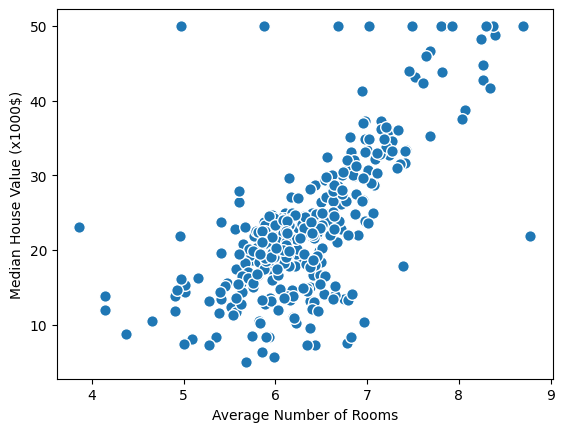

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [8]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass

### Gradient Descent

In [9]:
class LinearRegression_GD(LinearRegression):
        def __init__(self,eta=0.001, max_iter=200, random_state=42):
            self.random_state = random_state
            self.eta = eta
            self.max_iter = max_iter
            self.w = None
            self.costs = []

    
        def predict(self,X):
            return np.dot(X, self.w[1:]) + self.w[0]

        def fit(self, X, y):
            rgen = np.random.RandomState(self.random_state)
            self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
            self.costs=[]
            for i in range (self.max_iter):
                y_pred=self.predict(X)
                diff =y-y_pred
                self.w[0]+=self.eta*np.sum(diff)
                self.w[1:]+=self.eta*np.dot(X.T,diff)
                cost=np.sum(diff**2)/2
                self.costs.append(cost)


- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

**After try 3 learning rate value we has the most suitable LR is 1e-4 because**

**The suitable learning rate is 1e-4 because 1e-2 and 1e-3 is relatively high learning rate lead to unstable update, each update to the weights is large, which can cause the model to overshoot the optimal solution, often resulting in oscillations, divergence, or NaN values in the weights.**


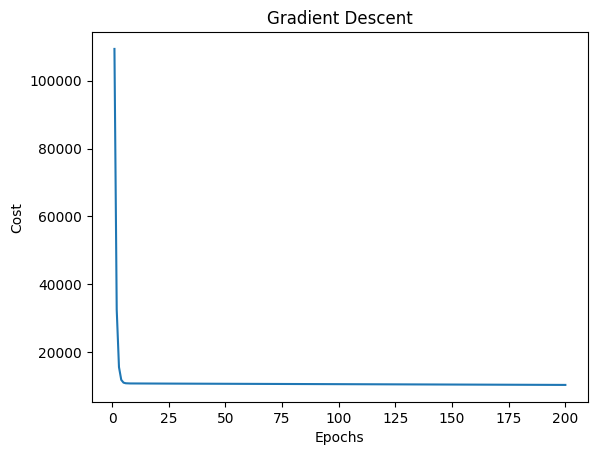

In [10]:
# Initialize the model
reg_GD = LinearRegression_GD(eta=1e-4)

# Train model
reg_GD.fit(X_train,y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

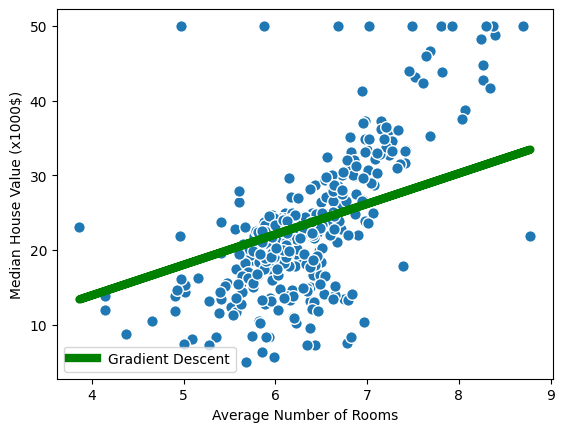

In [11]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [12]:
from sklearn.linear_model import SGDRegressor

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [13]:
# Initialize the model
reg_SGD = SGDRegressor(eta0= 1e-4,max_iter= 200,random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

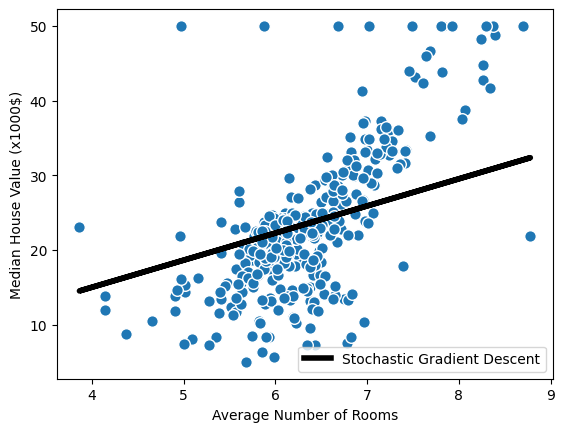

In [14]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()


reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

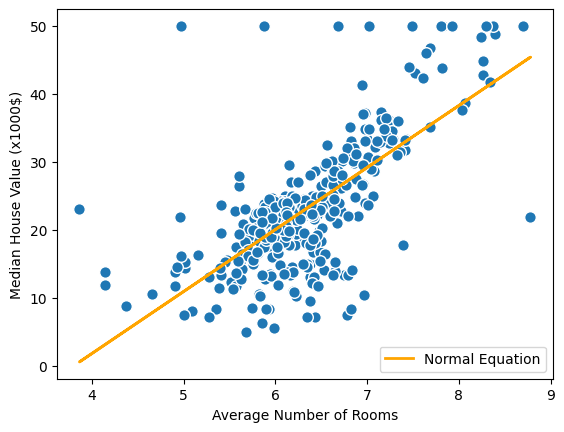

In [17]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

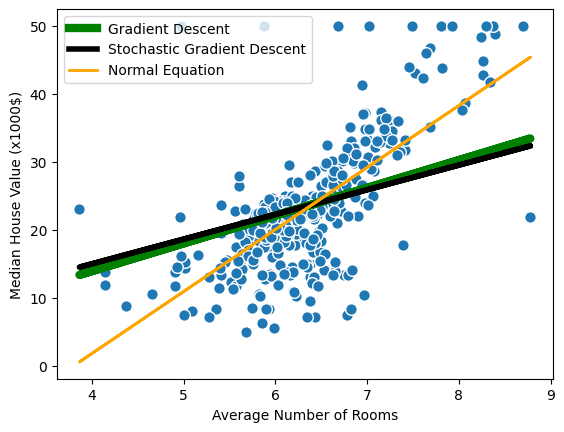

In [18]:

plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [19]:
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[0.48447384 3.62945908]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [20]:
y_pred_GD = reg_GD.predict(X_test)

In [21]:
y_pred_SGD = reg_SGD.predict(X_test)

In [22]:
y_pred_NE = reg_NE.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [24]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.413509
MAE of NE: 4.314224


In [25]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.750232
MSE of NE: 40.35145


In [26]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.265227
R2 of NE: 0.458465


## Experiment with Standardized Data

In [27]:
# Re-load the dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [28]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [29]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [30]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [31]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test =train_test_split(X_new,y,test_size=0.3,random_state=42)

### Gradient Descent

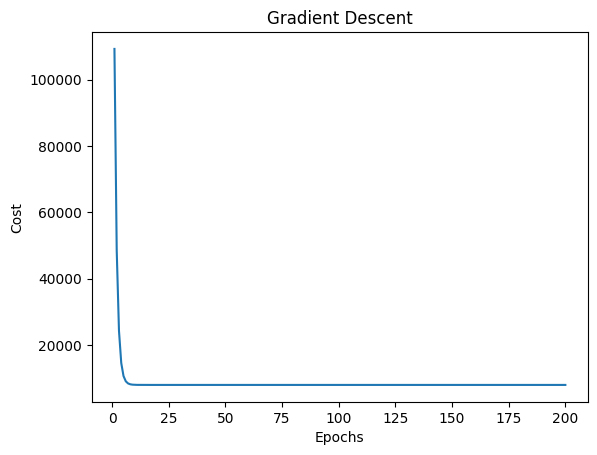

In [32]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegression_GD(eta=1e-3,max_iter=200,random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



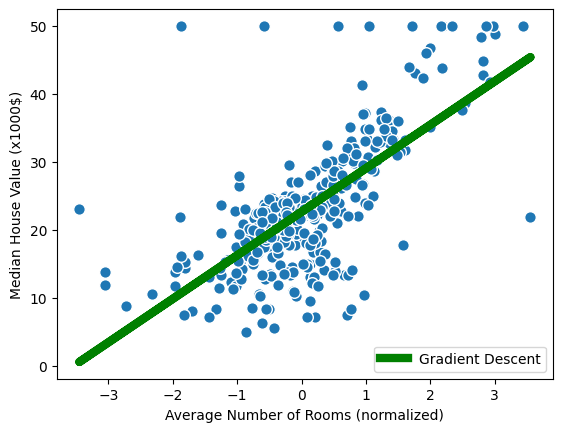

In [33]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [34]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0 = 1e-3,max_iter=200,random_state=42,learning_rate='constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


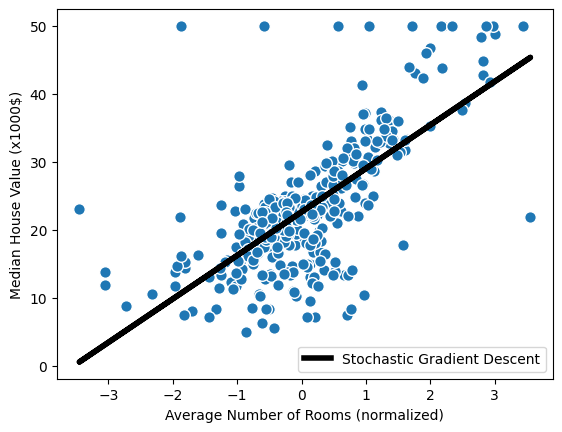

In [35]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [36]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_test_norm, y_test)

LinearRegression()

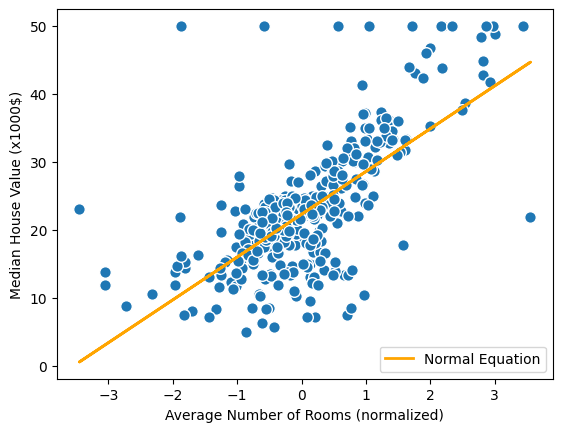

In [37]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

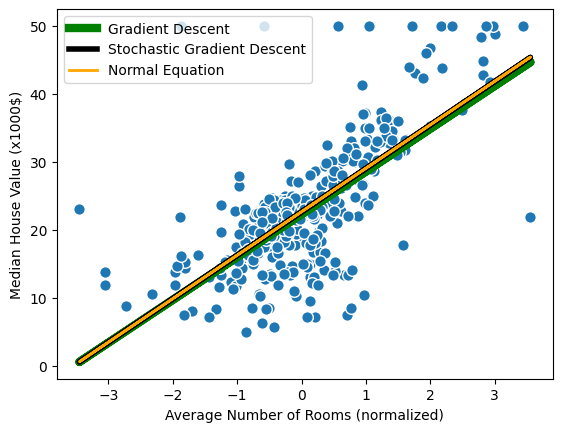

In [38]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [39]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [40]:
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_SGD

array([22.62083926,  6.39567675])

In [41]:
w_NE = np.append(reg_NE.intercept_,reg_NE.coef_)
w_NE

array([22.26569997,  6.29988694])

In [42]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [43]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [44]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [45]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.312817
MAE of NE: 4.307852


In [46]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336472
MSE of NE: 40.211511


In [47]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458666
R2 of NE: 0.460343


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [48]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [49]:
X = housing_dataset.drop(columns=["MEDV"]).values
y = housing_dataset['MEDV'].values


In [50]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state = 42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
What is the suitable learning rate value?

 **The suitable learning rate is 1e-8 because the others is relatively high learning rate lead to unstable update, each update to the weights is large, which can cause the model to overshoot the optimal solution, often resulting in oscillations, divergence, or NaN values in the weights.**

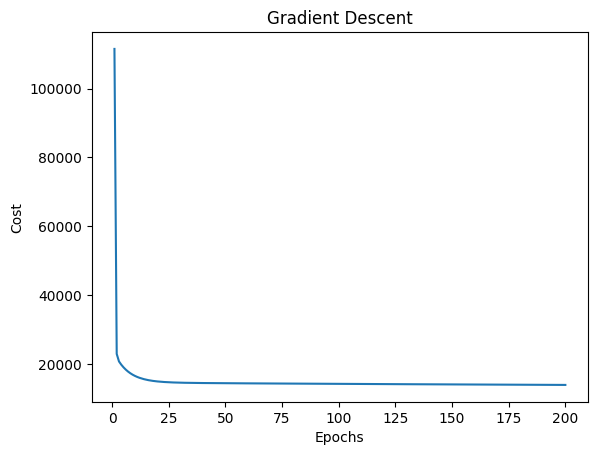

In [51]:
# Initalize the GD model
reg_GD = LinearRegression_GD(eta = 1e-8)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [52]:
# Initialize the SGD model
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

### Normal Equation

In [53]:
# Add the '1' column to data
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

In [54]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train,y_train)

LinearRegression()

### Algorithms Comparisons

In [55]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [56]:
w_SGD = np.append(reg_SGD.intercept_,reg_SGD.coef_)
w_SGD

array([ 2.62785137e+09, -7.37494338e+10,  1.58384987e+11,  5.07649337e+11,
       -1.33972059e+10, -2.48007591e+10, -6.25382002e+10, -4.35163860e+10,
        2.79196570e+11,  2.20147773e+11, -4.29414770e+11,  3.32146050e+11,
        4.10494502e+11, -8.06694709e+11])

In [57]:
w_NE = np.append(reg_NE.intercept_,reg_NE.coef_)
w_NE

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

In [58]:
y_pred_GD = reg_GD.predict(X_test)

In [59]:
y_pred_SGD = reg_SGD.predict(X_test)

In [60]:
y_pred_NE = reg_NE.predict(np.hstack([np.ones((X_test.shape[0], 1)), X_test]))

In [61]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 79127492290639.95
MAE of NE: 3.16271


In [62]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 1.1673878266879424e+28
MSE of NE: 21.517444


In [63]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: -1.5666881342014273e+26
R2 of NE: 0.711226


## Experiment with Standardized Data

In [64]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [65]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [66]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [67]:
X_new = housing_dataset.drop(columns=["MEDV"]).values
y = housing_dataset['MEDV'].values

In [68]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new,y,test_size=0.3, random_state = 42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

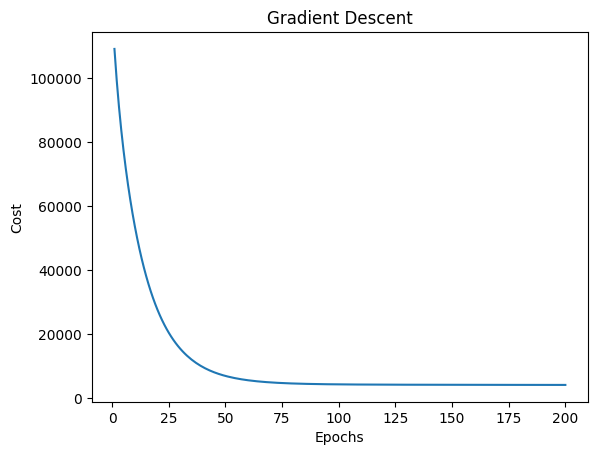

In [69]:
# Initalize the GD model
reg_GD = LinearRegression_GD(eta= 1e-4,max_iter=200,random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [70]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42,learning_rate = 'constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

C:\Users\Oreo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [71]:
# Initialize NE model
reg_NE = LinearRegression()
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [72]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [73]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [74]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471,  0.        , -1.14691411,  0.83432605,  0.33940694,
        0.79163612, -1.784727  ,  2.84783949, -0.30429306, -2.91562521,
        2.11140045, -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [75]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [76]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [77]:
y_pred_NE = reg_NE.predict( np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm]))

In [78]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [79]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [80]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

$R^2$ là một hệ số xác định dùng để đánh giá độ phù hợp của mô hình hồi quy, $R^2$ cho chúng ta biết thông tin về mức độ mà các biến độc lập giải thích sự biến thiên của biến phụ thuộc

**Công thức**
$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Khoảng giá trị của $R^2$ là [0,1]  cho thấy tỷ lệ biến thiên được mô hình giải thích.

**Ví dụ:**
Một R² là 0.70 có nghĩa là 70% biến thiên của biến phụ thuộc có thể được giải thích bởi các biến độc lập, trong khi 30% không được giải thích (do sai số hoặc các yếu tố khác).

